In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_style('whitegrid')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

In [74]:
df = pd.read_csv('Cyber_salaries.csv')

In [75]:
df.shape

(1349, 11)

In [76]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Information Security Officer,68000,EUR,72762,DE,100,DE,S
1,2022,SE,FT,Security Officer,123400,USD,123400,US,0,US,M
2,2022,SE,FT,Security Officer,88100,USD,88100,US,0,US,M
3,2022,SE,FT,Security Engineer,163575,USD,163575,US,100,US,M
4,2022,SE,FT,Security Engineer,115800,USD,115800,US,100,US,M


In [77]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1349 non-null   int64 
 1   experience_level    1349 non-null   object
 2   employment_type     1349 non-null   object
 3   job_title           1349 non-null   object
 4   salary              1349 non-null   int64 
 5   salary_currency     1349 non-null   object
 6   salary_in_usd       1349 non-null   int64 
 7   employee_residence  1349 non-null   object
 8   remote_ratio        1349 non-null   int64 
 9   company_location    1349 non-null   object
 10  company_size        1349 non-null   object
dtypes: int64(4), object(7)
memory usage: 116.1+ KB


In [79]:
df["job_title"].value_counts()

job_title
Security Engineer                          247
Cyber Security Analyst                     134
Penetration Tester                          77
Information Security Manager                65
Cyber Security Engineer                     63
                                          ... 
Computer Forensic Software Engineer          1
Principal Application Security Engineer      1
Cyber Program Manager                        1
Application Security Specialist              1
Concierge Security Engineer                  1
Name: count, Length: 87, dtype: int64

In [81]:
# top 20 titles
df["job_title"].value_counts().head(20)

job_title
Security Engineer                     247
Cyber Security Analyst                134
Penetration Tester                     77
Information Security Manager           65
Cyber Security Engineer                63
Security Analyst                       53
Information Security Analyst           39
Cyber Security Specialist              31
Information Security Officer           29
Cyber Threat Intelligence Analyst      29
SOC Analyst                            28
Chief Information Security Officer     27
Cyber Security Architect               25
DevSecOps Engineer                     24
Application Security Engineer          24
Security Consultant                    21
Information Security Engineer          20
Security Specialist                    20
Incident Response Analyst              18
Information Security Specialist        17
Name: count, dtype: int64

<Axes: title={'center': 'Top 20 Cyber Security Job Titles'}, xlabel='job_title'>

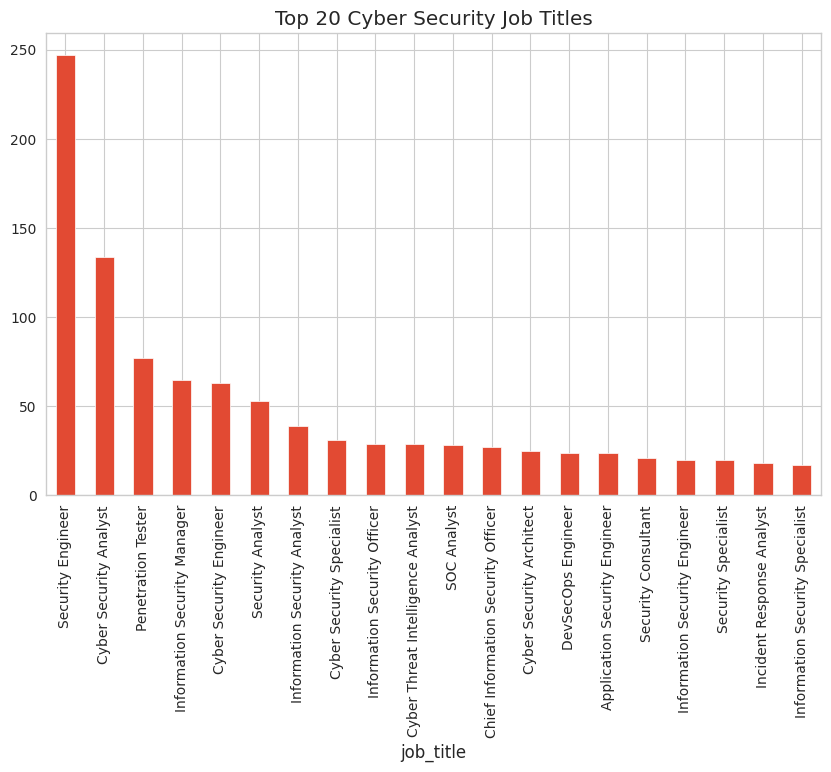

In [84]:
df["job_title"].value_counts().head(20).plot(kind='bar',figsize=(10, 6), title='Top 20 Cyber Security Job Titles')

In [85]:
df.sample(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
178,2022,EN,FT,Data Security Analyst,50000,USD,50000,US,100,US,L


<Axes: title={'center': 'Top 20 Cyber Security Job Titles in US'}, xlabel='job_title'>

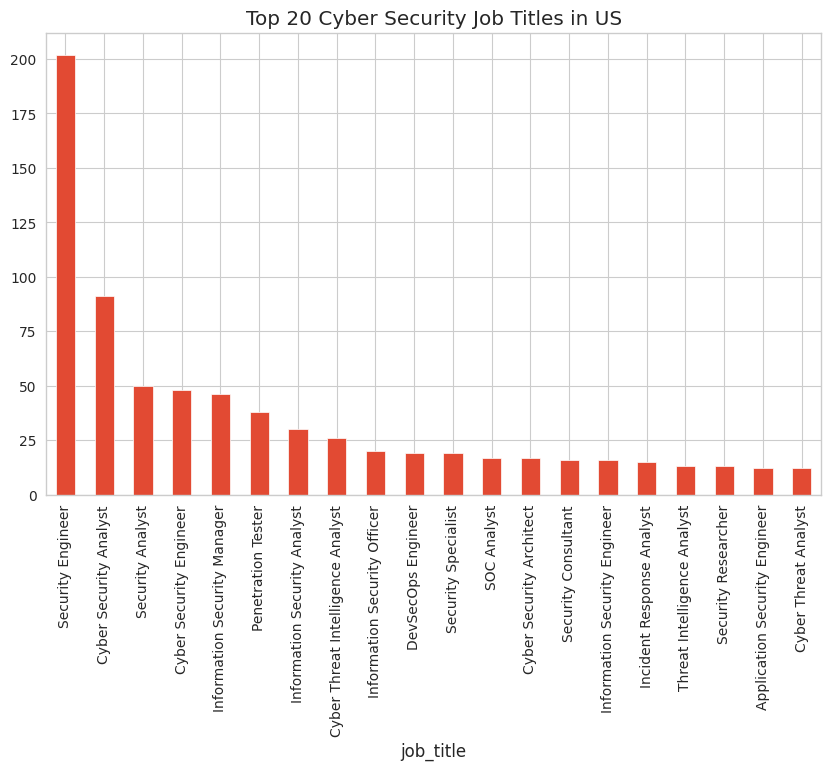

In [93]:
df[df['company_location'] == "US"]['job_title'].value_counts().head(20).plot(kind='bar',figsize=(10, 6), title='Top 20 Cyber Security Job Titles in US')

In [94]:
df.sample(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
401,2022,MI,FT,Security Engineer,102100,USD,102100,US,0,US,M
291,2022,SE,FT,Security Specialist,153600,USD,153600,US,100,US,L


In [95]:
df[df['company_location'] == "US"]['salary_in_usd'].describe()

count       965.000000
mean     135559.566839
std       61320.768696
min        8223.000000
25%       93000.000000
50%      129000.000000
75%      165200.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

<Axes: title={'center': 'US Salary Distribution'}>

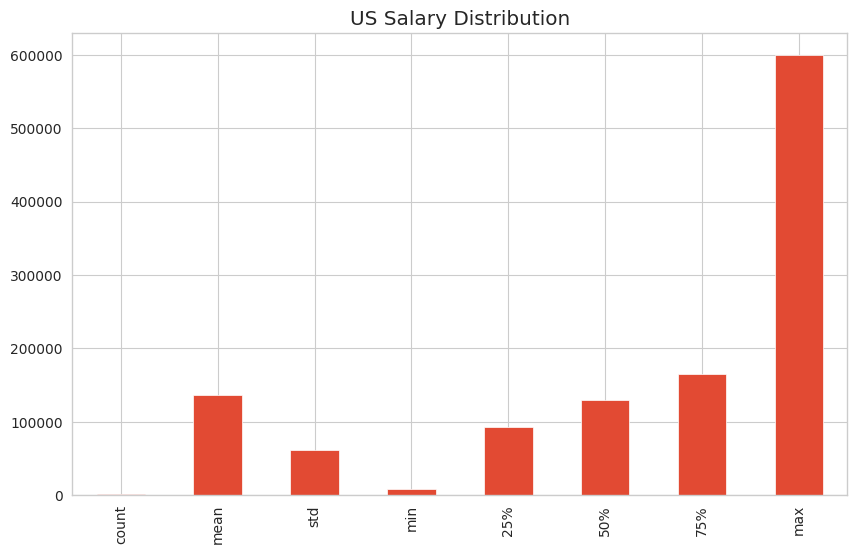

In [99]:
df[df['company_location'] == "US"]['salary_in_usd'].describe().plot(kind='bar',figsize=(10, 6), title="US Salary Distribution")

In [100]:
df.sample(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1234,2021,SE,FT,Information Security Specialist,155000,CHF,169525,CH,100,CH,L
17,2022,SE,FT,Security Analyst,81600,USD,81600,US,100,US,M


In [101]:
df["experience_level"].value_counts()

experience_level
SE    622
MI    433
EN    218
EX     76
Name: count, dtype: int64

In [102]:
df.groupby("experience_level")["salary_in_usd"].mean()

experience_level
EN     63726.623853
EX    198019.671053
MI    102296.923788
SE    145937.451768
Name: salary_in_usd, dtype: float64

<Axes: title={'center': 'Average Salary by Experience Level'}, xlabel='experience_level'>

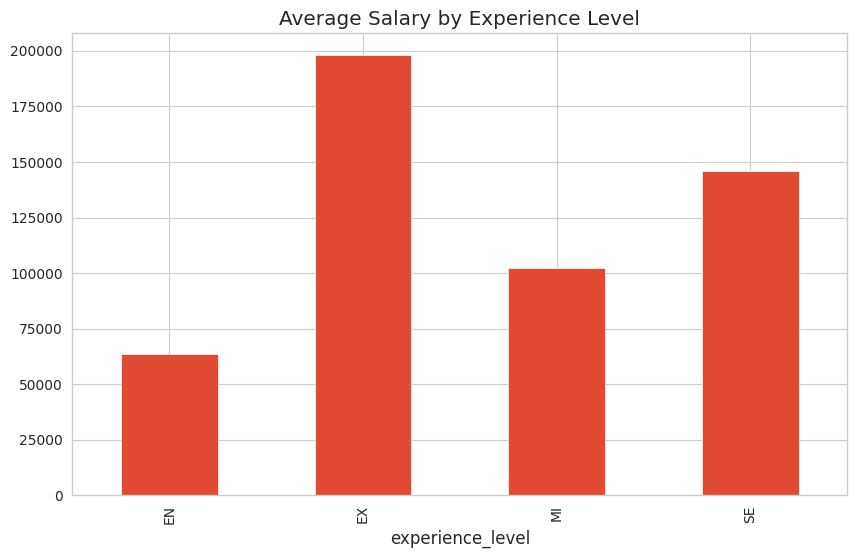

In [103]:
df.groupby("experience_level")["salary_in_usd"].mean().plot(kind='bar',figsize=(10, 6), title="Average Salary by Experience Level")

In [104]:
df.sample(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
846,2021,SE,FT,Product Security Engineer,85000,EUR,100474,ES,100,ES,L
661,2022,SE,FT,Cyber Threat Intelligence Analyst,150000,USD,150000,US,100,US,L


In [106]:
df['employment_type'].value_counts()

employment_type
FT    1326
CT      11
PT       9
FL       3
Name: count, dtype: int64

<Axes: title={'center': 'Employment Type'}, xlabel='employment_type'>

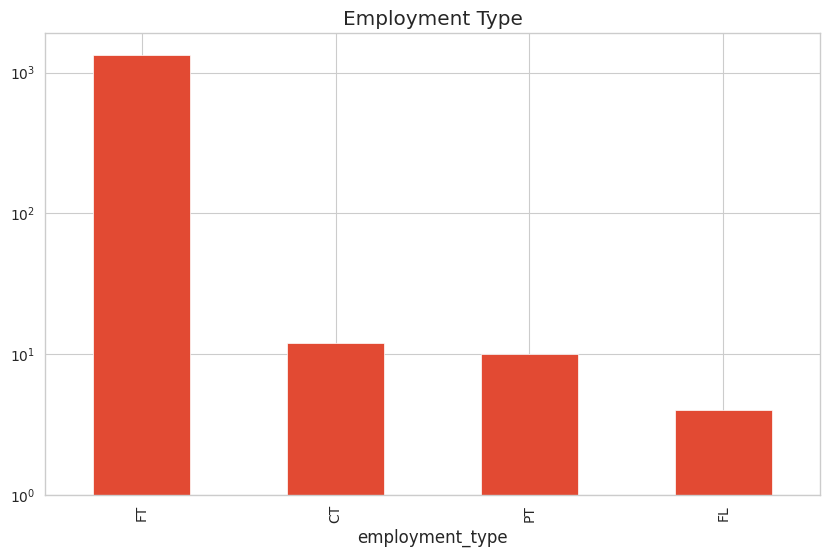

In [108]:
df['employment_type'].value_counts().plot(kind='bar',figsize=(10, 6), title='Employment Type', log=True)

In [117]:
employment_type_by_job_title = df.groupby("employment_type")["job_title"].unique()

In [120]:
employment_type_by_job_title

employment_type
CT    [Cyber Security Analyst, Application Security ...
FL    [Information Security Officer, Cyber Security ...
FT    [Information Security Officer, Security Office...
PT    [Information Security Compliance Analyst, Secu...
Name: job_title, dtype: object

In [122]:
contracting_roles = employment_type_by_job_title[0]

In [124]:
freelancing_roles = employment_type_by_job_title[1]

In [125]:
fulltime_roles = employment_type_by_job_title[2]

In [126]:
parttime_roles = employment_type_by_job_title[3]

In [129]:
for item in contracting_roles:
  print(item)

Cyber Security Analyst
Application Security Engineer
Cyber Security Specialist
SOC Analyst
Detection Engineer
Chief Information Security Officer
Security Engineer
Cyber Security Architect


In [130]:
for title in freelancing_roles:
  print(title)

Information Security Officer
Cyber Security Specialist
Cyber Security Researcher


In [133]:
print(len(contracting_roles))
print(len(freelancing_roles))
print(len(fulltime_roles))
print(len(parttime_roles))

8
3
87
7


In [136]:


# show all rows
pd.set_option('display.max_rows', None)

In [138]:
# groupby employment_type with job_title, salary
df.groupby(["employment_type", "job_title","company_location", "company_size"])["salary_in_usd"].mean()

employment_type  job_title                                   company_location  company_size
CT               Application Security Engineer               CA                L               200000.000000
                 Chief Information Security Officer          AU                M               103310.000000
                 Cyber Security Analyst                      BW                S               120000.000000
                                                             GB                L               192396.000000
                                                             US                L                70000.000000
                 Cyber Security Architect                    US                M                72000.000000
                 Cyber Security Specialist                   PL                S                67307.000000
                 Detection Engineer                          US                L               135000.000000
                 SOC Analyst        

In [139]:
# correlation matrix
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,0.024064,0.191355,0.143046
salary,0.024064,1.000000,-0.032898,0.017917
salary_in_usd,0.191355,-0.032898,1.000000,0.185180
remote_ratio,0.143046,0.017917,0.185180,1.000000


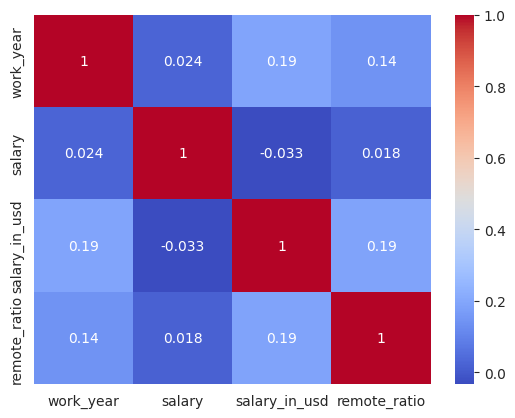

In [140]:
# plot heatmap for correlation_matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

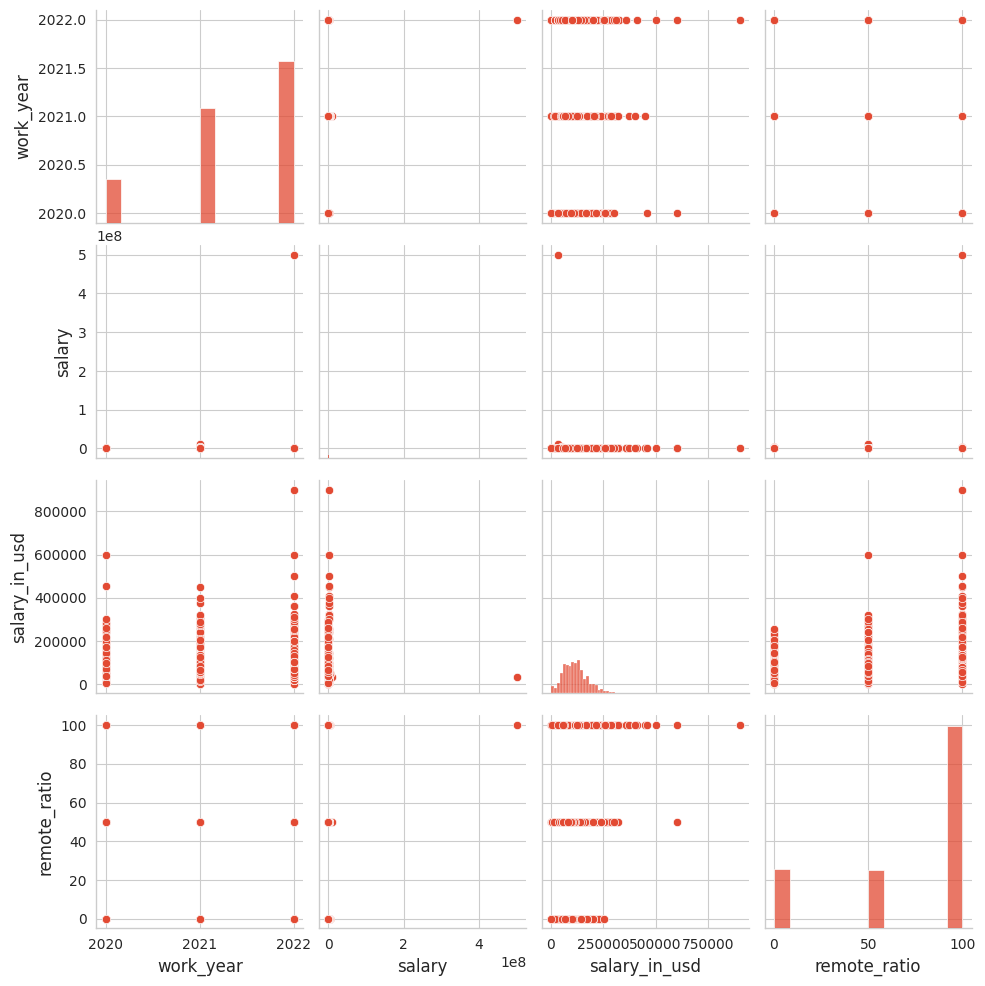

In [141]:
# pairplot
sns.pairplot(df)
plt.show()